In [1]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from scipy.io import wavfile
import numpy as np
from librosa.core import resample

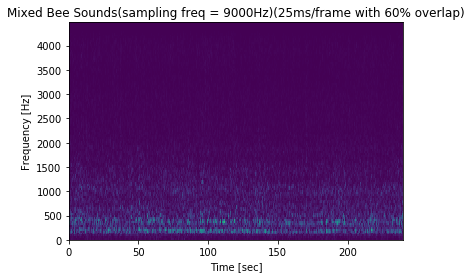

In [2]:
sample_rate, samples = wavfile.read('audio_mixed.wav')
#downsampling to 10000Hz
sr = 9000
resampled = resample(samples.astype(np.float32),sample_rate,sr) 

#make sure every signal is within the range of (0,1)
samples_casted = resampled / (2.**15) 

seg_len = sr/40 #25ms
overlap = seg_len*0.6  #60% overlap
f, t, Zxx = signal.stft(samples_casted, fs = sr, nperseg = seg_len, noverlap = overlap)

Zxx_abs = np.abs(Zxx)
plt.pcolormesh(t, f, Zxx_abs, vmin = Zxx_abs.min(), vmax = Zxx_abs.max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Mixed Bee Sounds(sampling freq = 9000Hz)(25ms/frame with 60% overlap)')
plt.show()

In [3]:
audio = Zxx.real

In [5]:
audio.shape

(113, 24001)

In [19]:
print("audio-dimension",audio.shape[0]) #i.e. frequency components
print("f-dimension",f.shape[0])
print("t-dimension",t.shape[0])

audio-dimension 113
f-dimension 113
t-dimension 24001


In [20]:
cols = []
for i in range(len(f)):
    cols.append(str((f[i])))

In [25]:
A_data = np.array([[0.0 for i in range(len(f))] for i in range(len(t))])
for i in range(len(t)):
    A_data[i] = audio[:,i]

In [29]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline


from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [33]:
df = pd.Dataframe()
df = pd.Dataframe(A_data, cols)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [9]:
#X: shifted dataset (each feature has mean value of zero)
X = audio - audio.mean()
#Z: shifted and standardized dataset 
Z = X / audio.std()
U, S, Vt = np.linalg.svd(Z, full_matrices=False)
print("Size X = ", X.shape)
print("Size Sigma = ",S.shape)
print("Size U = ",U.shape)
print("Size Vt = ",Vt.shape)
print(S)
variances = S**2
V = Vt.T

Size X =  (113, 24001)
Size Sigma =  (113,)
Size U =  (113, 113)
Size Vt =  (113, 24001)
[  8.12838928e+02   7.48396545e+02   5.09411804e+02   4.18719360e+02
   3.88440216e+02   3.41844696e+02   3.03088074e+02   2.99723907e+02
   2.63565369e+02   2.57975403e+02   2.32353806e+02   2.17192108e+02
   2.06591965e+02   1.92833466e+02   1.82881760e+02   1.72800797e+02
   1.62383530e+02   1.48724670e+02   1.42346573e+02   1.32537430e+02
   1.21607437e+02   1.13626396e+02   1.04435844e+02   9.67959747e+01
   9.26645737e+01   9.01923523e+01   8.48768158e+01   8.02320328e+01
   7.46276474e+01   6.99541168e+01   6.54199753e+01   6.16566200e+01
   5.70245934e+01   5.39006729e+01   5.07212830e+01   4.81399269e+01
   4.60464935e+01   4.43720932e+01   4.20946350e+01   4.02025909e+01
   3.91291122e+01   3.84923096e+01   3.65772591e+01   3.50793114e+01
   3.42637978e+01   3.38304367e+01   3.30322075e+01   3.14168663e+01
   3.10471687e+01   3.02857018e+01   2.91465473e+01   2.90818882e+01
   2.78853836e

[24.36133072868591, 20.651687981484713, 9.56819534864076, 6.4645471886848966, 5.5634011816252142, 4.3087342790460665, 3.3871132980750964, 3.3123391277446435, 2.5613486905556893, 2.4538532771501935, 1.9906347541317326, 1.739322373866679, 1.5736887964522137, 1.3710611909203421, 1.2331979797169621, 1.1009903106785508, 0.97224554768657412, 0.81556399216663644, 0.7471125815804941, 0.64769284136763572, 0.54527087409971298, 0.47604771638037979, 0.40215288336806565, 0.34546704282618573, 0.31660626377348161, 0.29993797679577178, 0.2656257456611919, 0.23734911505908993, 0.20534848857419008, 0.18043408725911456, 0.15780208857230268, 0.14016882961870675, 0.11989923305594384, 0.10712242149508008, 0.094857671520606882, 0.085448193299218128, 0.078178105217115684, 0.07259586066601377, 0.06533494097442076, 0.059593665131286479, 0.056453646663823534, 0.054631099357090866, 0.049330365353074196, 0.045372649777599083, 0.04328754983287577, 0.042199490976645229, 0.040231590698330953, 0.0363929899341651, 0.03

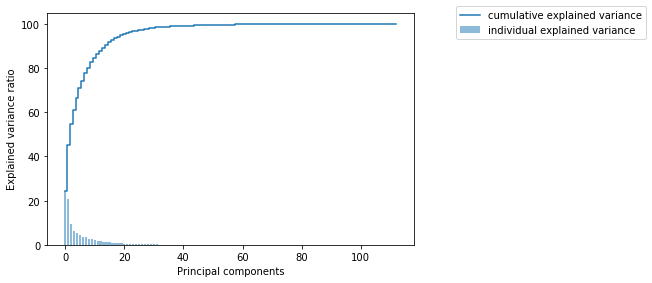

In [11]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)


plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

In [12]:
Zstar = Z@V[:,:36]

In [14]:
bee_p0 = Zstar[:,0]
bee_p1 = Zstar[:,1]

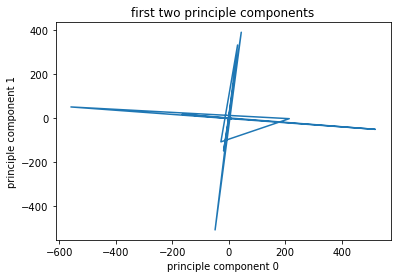

In [17]:
plt.plot(bee_p0, bee_p1)
plt.title("first two principle components")
plt.xlabel("principle component 0")
plt.ylabel("principle component 1")